# Flood Water Extent Data Exploration

 Analysis of Monthly Flood Water Extent in Kampala and Addis Ababa (2015-2025)

# Table of Contents
- Data Loading and Initial Setup  
- Data Overview and Structure  
- Data Quality Assessment  
- Descriptive Statistics  
- Temporal Analysis  
- Comparative Analysis Between Cities



# 1. Data Loading and Initial Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load the flood data
url = "https://raw.githubusercontent.com/MIT-Emerging-Talent/ET6-CDSP-group-01-repo/refs/heads/main/1_datasets/raw_data/Monthly_Flood_Water_Extent_Kampala_Addis_2015_2025_km2.csv"
df = pd.read_csv(url)

# Drop unnecessary columns as specified
df = df.drop(columns=['system:index', '.geo', 'source'])

In [15]:
df.head()

,city,flood_water_extent (km^2),month
0,Kampala,195.380092,2015-01
1,Kampala,207.921894,2015-02
2,Kampala,140.035708,2015-03
3,Kampala,112.024489,2015-04
4,Kampala,114.628558,2015-05


# 2. Data Overview and Structure

Display basic information about the dataset

In [16]:
df.shape

(250, 3)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       250 non-null    object 
 1   flood_water_extent (km^2)  250 non-null    float64
 2   month                      250 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [18]:
df['city'].unique()

array(['Kampala', 'Addis Ababa'], dtype=object)

In [19]:
# Create proper datetime column
df['date'] = pd.to_datetime(df['month'])
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

print(f"\nTime period covered: {df['year'].min()} - {df['year'].max()}")
print(f"Total months analyzed: {len(df['month'].unique())}")


Time period covered: 2015 - 2025
Total months analyzed: 126


# 3. Data Quality Assessment

In [20]:
# Check for missing values
df.isnull().sum()

,0
city,0
flood_water_extent (km^2),0
month,0
date,0
year,0
month_num,0
month_name,0


In [21]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [22]:
# Data type verification
df.dtypes

,0
city,object
flood_water_extent (km^2),float64
month,object
date,datetime64[ns]
year,int32
month_num,int32
month_name,object


In [25]:
# Check for negative or zero values (which might be unusual for flood extent)
negative_values = (df['flood_water_extent (km^2)'] < 0).sum()
zero_values = (df['flood_water_extent (km^2)'] == 0).sum()
print(f"\nNegative flood extent values: {negative_values}")
print(f"Zero flood extent values: {zero_values}")


Negative flood extent values: 0
Zero flood extent values: 0


In [26]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column_name):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    print(f"\n{column_name} Outlier Analysis:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(data) * 100:.2f}%")

    if len(outliers) > 0:
        print(f"  Outlier range: {outliers.min():.2f} - {outliers.max():.2f}")

    return outliers

flood_outliers = detect_outliers_iqr(df['flood_water_extent (km^2)'], "Flood Water Extent")


Flood Water Extent Outlier Analysis:
  Lower bound: -170.57
  Upper bound: 431.38
  Number of outliers: 1
  Percentage of outliers: 0.40%
  Outlier range: 440.31 - 440.31


# 4. Descriptive Statistics

In [30]:
# Overall statistics
df['flood_water_extent (km^2)'].describe()

,flood_water_extent (km^2)
count,250.000000
mean,131.940944
std,78.996617
min,7.856893
25%,55.157039
50%,146.750380
75%,205.644314
max,440.310755


In [33]:
# Statistics by city
df.groupby('city')['flood_water_extent (km^2)'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Addis Ababa,126.0,90.522465,82.167857,7.856893,23.382172,59.534897,146.774142,440.310755
Kampala,124.0,174.027464,47.210084,23.035301,151.849853,198.777281,207.941319,213.444912


In [34]:
# Additional statistical measures
print("\nAdditional Statistical Measures:")
for city in df['city'].unique():
    city_data = df[df['city'] == city]['flood_water_extent (km^2)']
    cv = (city_data.std() / city_data.mean()) * 100
    skewness = city_data.skew()
    kurtosis = city_data.kurtosis()

    print(f"\n{city}:")
    print(f"  Coefficient of Variation: {cv:.2f}%")
    print(f"  Skewness: {skewness:.3f}")
    print(f"  Kurtosis: {kurtosis:.3f}")
    print(f"  Range: {city_data.max() - city_data.min():.2f} km²")


Additional Statistical Measures:

Kampala:
  Coefficient of Variation: 27.13%
  Skewness: -1.349
  Kurtosis: 0.742
  Range: 190.41 km²

Addis Ababa:
  Coefficient of Variation: 90.77%
  Skewness: 1.269
  Kurtosis: 1.694
  Range: 432.45 km²



# 5. Temporal Analysis

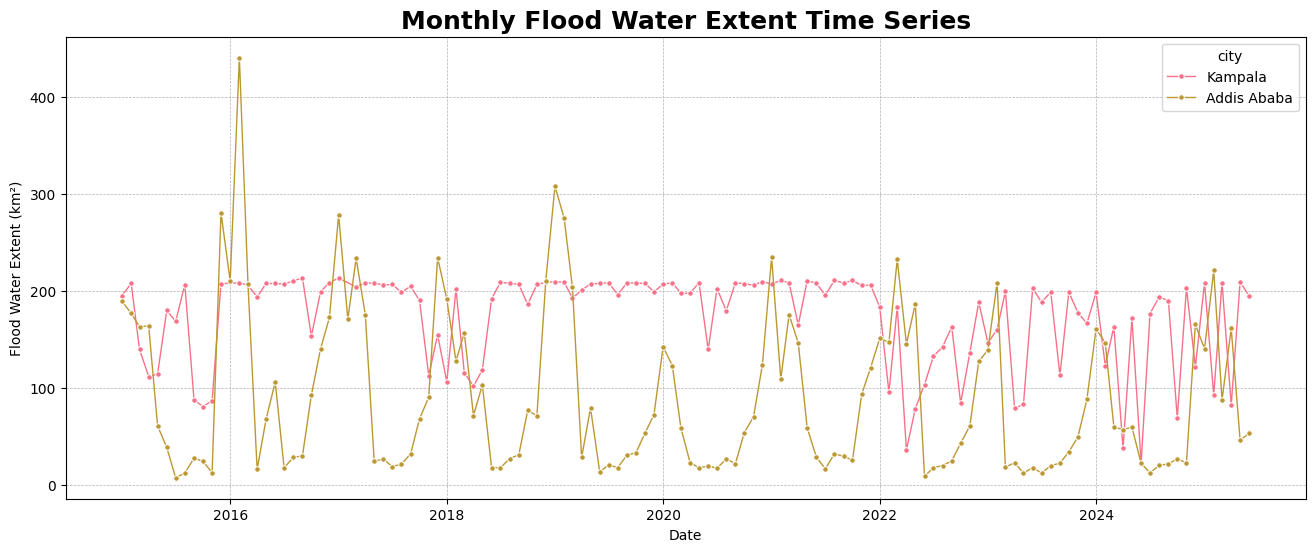

In [51]:
# Monthly time series
plt.figure(figsize=(16, 6))
sns.lineplot(
    data=df,
    x="date",  # Corrected column name
    y="flood_water_extent (km^2)",  # Corrected column name
    hue="city",  # Corrected column name
    marker="o",
    markersize=4,
    linewidth=1,
)
plt.title("Monthly Flood Water Extent Time Series", fontsize=18, fontweight="bold") # Updated title
plt.xlabel("Date")
plt.ylabel("Flood Water Extent (km²)") # Updated label
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

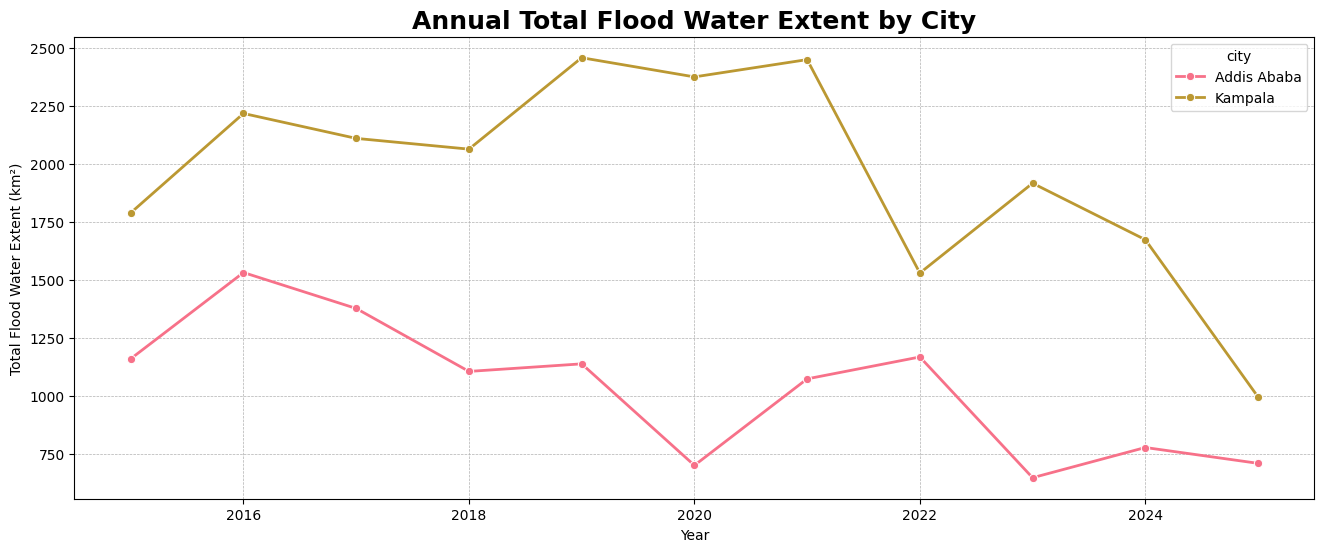

In [42]:
# Annual flood water extent
plt.figure(figsize=(16, 6)) # Create a new figure
annual_flood_extent = df.groupby(['year', 'city'])['flood_water_extent (km^2)'].sum().reset_index()
sns.lineplot(data=annual_flood_extent, x='year', y='flood_water_extent (km^2)', hue='city',
             marker='o', markersize=6, linewidth=2)
plt.title('Annual Total Flood Water Extent by City', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Flood Water Extent (km²)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

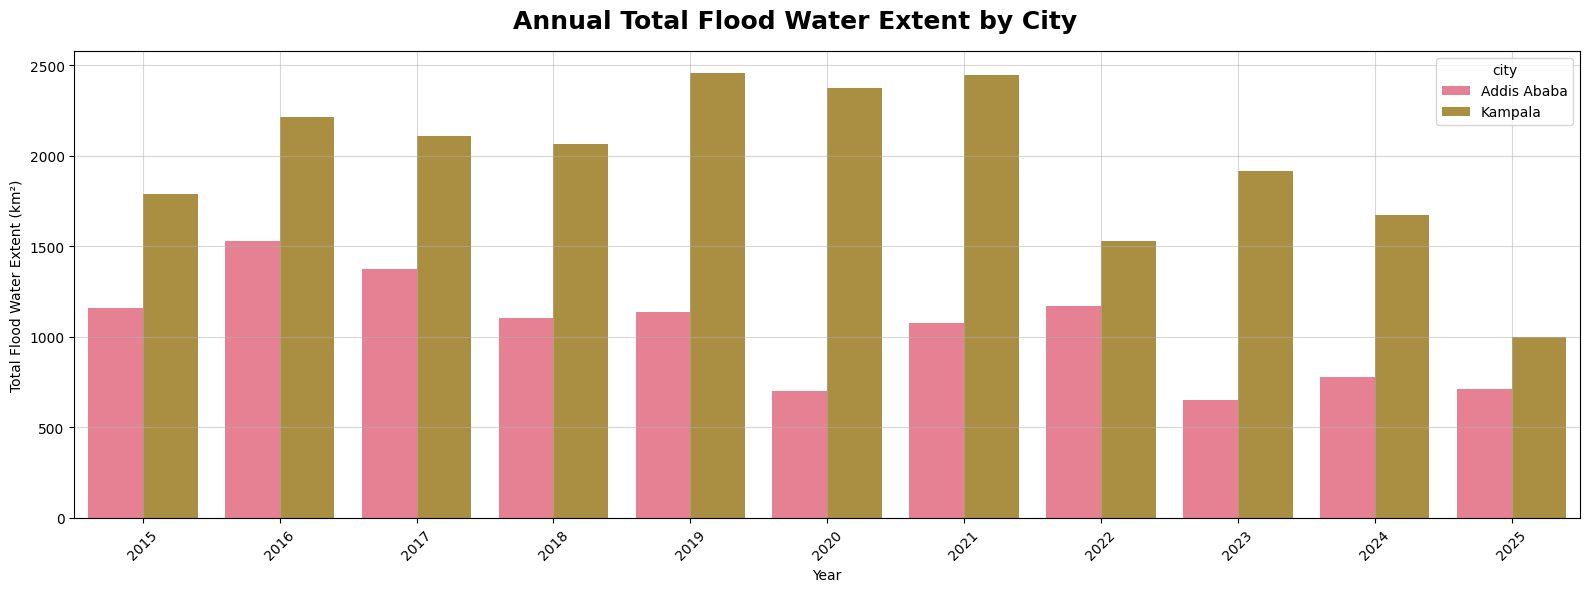

In [44]:
# Annual total flood water extent
fig_annual, ax_annual = plt.subplots(figsize=(16, 6)) # Create a new figure and axis
fig_annual.suptitle('Annual Total Flood Water Extent by City', fontsize=18, fontweight='bold')

annual_data = df.groupby(['year', 'city'])['flood_water_extent (km^2)'].sum().reset_index()
# Convert Year to string for plotting to avoid potential date interpretation issues
annual_data['year'] = annual_data['year'].astype(str)

sns.barplot(data=annual_data, x='year', y='flood_water_extent (km^2)', hue='city', ax=ax_annual)
ax_annual.set_xlabel('Year')
ax_annual.set_ylabel('Total Flood Water Extent (km²)')
ax_annual.tick_params(axis='x', rotation=45)
ax_annual.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

# 6. Comparative Analysis Between Cities

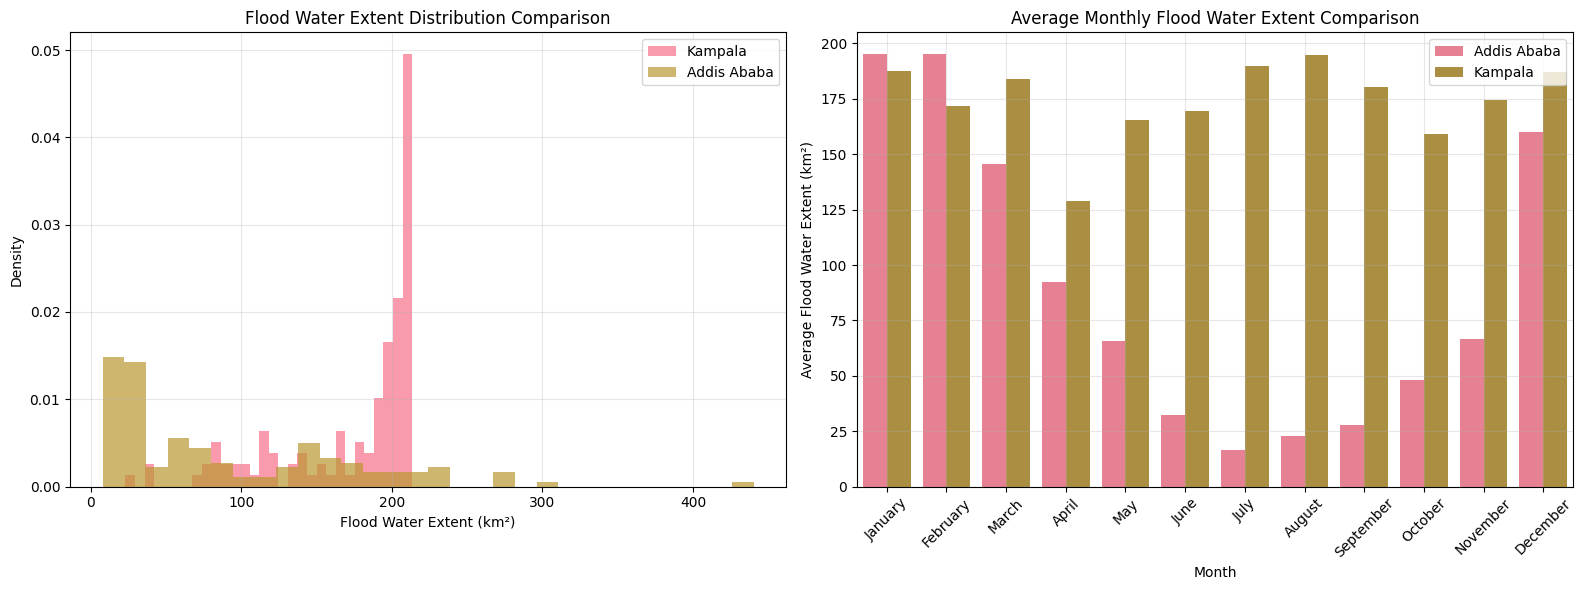

In [46]:
kampala_data = df[df['city'] == 'Kampala']['flood_water_extent (km^2)']
addis_data = df[df['city'] == 'Addis Ababa']['flood_water_extent (km^2)']

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Changed to 1 row, 2 columns

# Histogram comparison
axes[0].hist(kampala_data, bins=30, alpha=0.7, label='Kampala', density=True)
axes[0].hist(addis_data, bins=30, alpha=0.7, label='Addis Ababa', density=True)
axes[0].set_title('Flood Water Extent Distribution Comparison')
axes[0].set_xlabel('Flood Water Extent (km²)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Monthly comparison
# Use 'month_num' for correct ordering on the x-axis, then sort by it
monthly_comparison = df.groupby(['month_num', 'month_name', 'city'])['flood_water_extent (km^2)'].mean().reset_index()
monthly_comparison = monthly_comparison.sort_values('month_num')

sns.barplot(data=monthly_comparison, x='month_name', y='flood_water_extent (km^2)', hue='city', ax=axes[1])
axes[1].set_title('Average Monthly Flood Water Extent Comparison')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Flood Water Extent (km²)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45) # Rotate labels for readability
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

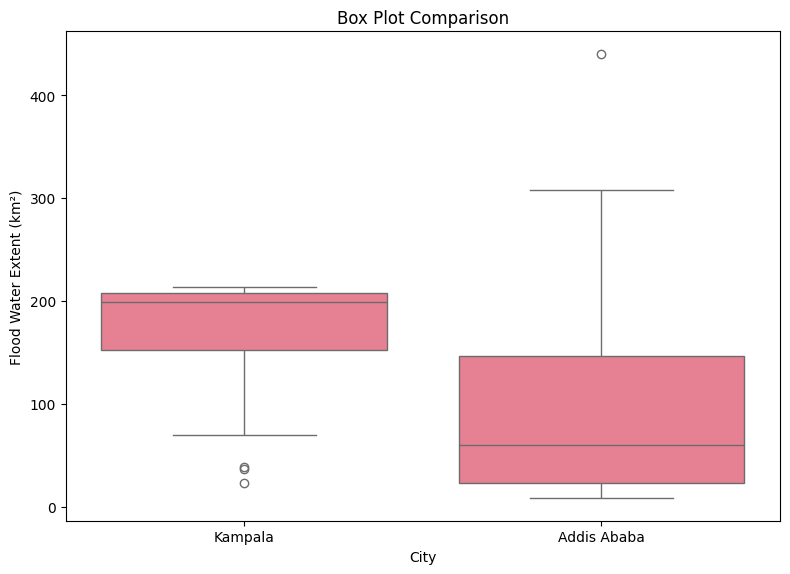

In [55]:
# Box plot
fig_box, ax_box = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x='city', y='flood_water_extent (km^2)', ax=ax_box)
ax_box.set_title('Box Plot Comparison')
ax_box.set_xlabel('City')
ax_box.set_ylabel('Flood Water Extent (km²)')
plt.suptitle('')
plt.tight_layout()
plt.show()